
# K Means Clustering with Python

This notebook is just a code reference for the video lecture and reading.

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Learning goals

- Explain the intuition behind k-means.
- Run k-means on toy data and interpret the output.
- Recognize common pitfalls (scaling, choice of k, randomness).


## K-means in a nutshell

K-means partitions the data into "k" groups by minimizing the **within-cluster sum of squares**. It alternates between two steps until convergence:

1. **Assign** each point to the nearest cluster center.
2. **Update** each center to be the mean of its assigned points.

This process is fast and simple, but it assumes clusters are roughly spherical and similar in size.


## Import Libraries

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Create some Data

In [23]:
from sklearn.datasets import make_blobs

`make_blobs` generates synthetic Gaussian clusters for quick experiments. It returns the feature matrix and the cluster labels used to create the points.


In [42]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

## Visualize Data

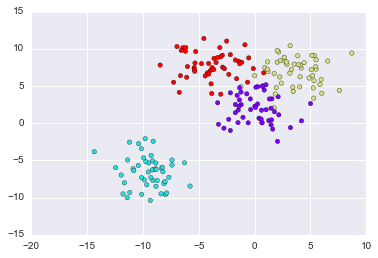

In [43]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Choosing k

K-means needs the number of clusters up front. Two common heuristics:

- **Elbow method**: plot within-cluster sum of squares vs. k and look for the bend.
- **Silhouette score**: higher values mean tighter, better separated clusters.

Always sanity-check with domain knowledge; k is not just a technical choice.


## Creating the Clusters

In [48]:
from sklearn.cluster import KMeans

In [49]:
kmeans = KMeans(n_clusters=4)

In [50]:
kmeans.fit(data[0])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [51]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

In [55]:
kmeans.labels_

array([2, 3, 1, 3, 3, 0, 3, 1, 3, 1, 2, 1, 3, 3, 2, 1, 3, 1, 0, 2, 0, 1, 1,
       0, 2, 0, 0, 1, 3, 3, 2, 0, 3, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2, 1, 3,
       2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 1, 1, 2, 3, 0, 3, 0, 2, 3, 1, 0, 3, 3,
       0, 3, 1, 0, 1, 0, 3, 3, 1, 2, 1, 1, 0, 3, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 1, 1, 0, 3, 2, 0, 3, 1, 0, 1, 1, 3, 1, 0, 3, 0, 0, 3, 2, 2, 3, 0,
       3, 2, 2, 3, 2, 1, 2, 1, 2, 1, 3, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 3, 2,
       3, 1, 0, 3, 0, 2, 2, 3, 1, 0, 2, 2, 2, 2, 1, 3, 1, 2, 3, 3, 3, 1, 3,
       1, 1, 2, 0, 2, 1, 3, 2, 1, 3, 1, 2, 3, 1, 2, 3, 3, 0, 3, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 0, 1, 3, 3, 0, 1], dtype=int32)

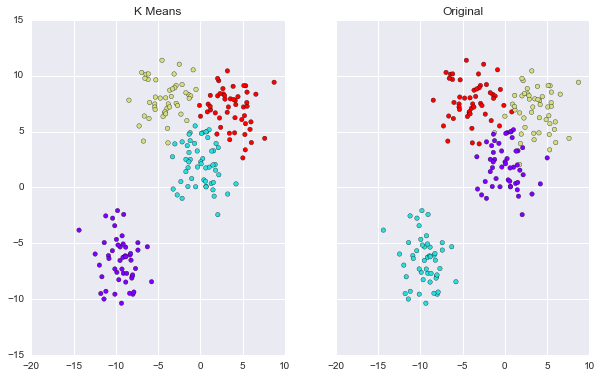

In [69]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Practical tips

- **Scale features** before clustering when units differ.
- Run multiple initializations (`n_init`) to avoid poor local minima.
- Use `random_state` for reproducible results in demos.
- Interpret cluster labels carefully: the numbers are arbitrary.


You should note, the colors are meaningless in reference between the two plots.